# Analysis of UFO sightings in the USA (1930-2000)
## Plan:
* Exploring and cleaning the Data
* Adding usefull columns
* Trying to find patterns using different plots


In [1]:
import pandas as pd
import numpy as np
from pandas import Series,DataFrame
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
reports = pd.read_csv('ufo.csv')

In [3]:
reports.head(10)

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
5,Valley City,NaN,DISK,ND,9/15/1934 15:30
6,Crater Lake,NaN,CIRCLE,CA,6/15/1935 0:00
7,Alma,NaN,DISK,MI,7/15/1936 0:00
8,Eklutna,NaN,CIGAR,AK,10/15/1936 17:00
9,Hubbard,NaN,CYLINDER,OR,6/15/1937 0:00


In [4]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18241 entries, 0 to 18240
Data columns (total 5 columns):
City               18216 non-null object
Colors Reported    2882 non-null object
Shape Reported     15597 non-null object
State              18241 non-null object
Time               18241 non-null object
dtypes: object(5)
memory usage: 712.6+ KB


### A lot of NaN values in Colors Reported and Shape Reported columns
* Exploring these columns more detailed  

In [5]:
reports['Colors Reported'].unique()

array([nan, 'RED', 'GREEN', 'BLUE', 'ORANGE', 'YELLOW', 'ORANGE YELLOW',
       'RED GREEN', 'RED BLUE', 'RED ORANGE', 'RED GREEN BLUE',
       'RED YELLOW GREEN', 'RED YELLOW', 'GREEN BLUE',
       'ORANGE GREEN BLUE', 'ORANGE GREEN', 'YELLOW GREEN',
       'RED YELLOW BLUE', 'ORANGE BLUE', 'RED YELLOW GREEN BLUE',
       'YELLOW GREEN BLUE', 'RED ORANGE YELLOW', 'RED ORANGE YELLOW BLUE',
       'YELLOW BLUE', 'RED ORANGE GREEN', 'RED ORANGE BLUE',
       'ORANGE YELLOW GREEN', 'ORANGE YELLOW BLUE'], dtype=object)

In [6]:
reports['Shape Reported'].unique()

array(['TRIANGLE', 'OTHER', 'OVAL', 'DISK', 'LIGHT', 'CIRCLE', 'CIGAR',
       'CYLINDER', 'FIREBALL', 'SPHERE', nan, 'RECTANGLE', 'FORMATION',
       'FLASH', 'CHEVRON', 'EGG', 'CONE', 'DIAMOND', 'VARIOUS',
       'TEARDROP', 'CROSS', 'DELTA', 'ROUND', 'DOME', 'PYRAMID',
       'CRESCENT', 'FLARE', 'HEXAGON'], dtype=object)

* NaN values in Colors Reported column just filling with 'UNKNOWN'
* In Shape Reported column it seems to be 2 types of undefined shape: 'OTHER' and 'VARIOUS'
* Filling NaN values with 'VARIOUS', replacing 'OTHER' with 'VARIOUS' as well

In [7]:
#fill Nan in Colors reported column
reports['Colors Reported'] = reports['Colors Reported'].fillna('UNKNOWN')
#fill Nan in Colors reported column
reports['Shape Reported'] = reports['Shape Reported'].fillna('VARIOUS')
reports['Shape Reported'] = reports['Shape Reported'].replace('OTHER','VARIOUS')

### Adding new column with 4 Regions of the USA 
* At first exploring State column 

In [8]:
reports.State.unique()

array(['NY', 'NJ', 'CO', 'KS', 'ND', 'CA', 'MI', 'AK', 'OR', 'AL', 'SC',
       'IA', 'GA', 'TN', 'NE', 'LA', 'KY', 'WV', 'NM', 'UT', 'RI', 'FL',
       'VA', 'NC', 'TX', 'WA', 'ME', 'IL', 'AZ', 'OH', 'PA', 'MN', 'WI',
       'MD', 'SD', 'NV', 'ID', 'MO', 'OK', 'IN', 'CT', 'MS', 'AR', 'WY',
       'MA', 'MT', 'DE', 'NH', 'VT', 'HI', 'Ca', 'Fl'], dtype=object)

* Replacing repeated values 'Ca' and 'Fl'

In [9]:
reports.State = reports.State.replace(['Ca','Fl'],['CA','FL'])

* Creating and mapping Series with regions on State column

In [10]:
def concat():
    west = ['WA','OR','WT','ID','WY','CA','NV','UT','CO','AZ','NM','AK','HI','MT']
    midwest = ['ND','MN','IA','MO','SD','NE','KS','WI','MI','IL','IN','OH']
    northeast = ['NH','VT','ME','MA','RI','CT','NY','PA','NJ']
    south = ['OK','TX','AR','LA','KY','TN','MS','AL','WV','VA','NC','SC','GA','FL','DE','MD','DC']
    ser_list = [
        Series(['West',]*len(west),index=west),
        Series(['Midwest',]*len(midwest),index=midwest),
        Series(['Northeast',]*len(northeast),index=northeast),
        Series(['South',]*len(south),index=south)
    ]
    return pd.concat(ser_list)

reports['Region'] = reports['State'].map(concat())

### Converting Time column to Daytime format

In [11]:
reports['Time'] = reports['Time'].map(pd.to_datetime)

* Adding new columns based on Time column 

In [12]:
import calendar
reports['Day'] = reports.Time.dt.day
reports['Month'] = reports.Time.dt.month
reports['Month'] = reports['Month'].apply(lambda x: calendar.month_abbr[x])
reports['Year'] = reports.Time.dt.year
reports['Hour'] = reports.Time.dt.hour

* Dropping columns unusefull for my analysis

In [13]:
reports.drop(['City','Time'],axis=1,inplace=True)

In [14]:
reports.head(10)

,Colors Reported,Shape Reported,State,Region,Day,Month,Year,Hour
0,UNKNOWN,TRIANGLE,NY,Northeast,1,Jun,1930,22
1,UNKNOWN,VARIOUS,NJ,Northeast,30,Jun,1930,20
2,UNKNOWN,OVAL,CO,West,15,Feb,1931,14
3,UNKNOWN,DISK,KS,Midwest,1,Jun,1931,13
4,UNKNOWN,LIGHT,NY,Northeast,18,Apr,1933,19
5,UNKNOWN,DISK,ND,Midwest,15,Sep,1934,15
6,UNKNOWN,CIRCLE,CA,West,15,Jun,1935,0
7,UNKNOWN,DISK,MI,Midwest,15,Jul,1936,0
8,UNKNOWN,CIGAR,AK,West,15,Oct,1936,17
9,UNKNOWN,CYLINDER,OR,West,15,Jun,1937,0


### Plotting frequency of UFO sightings based on region

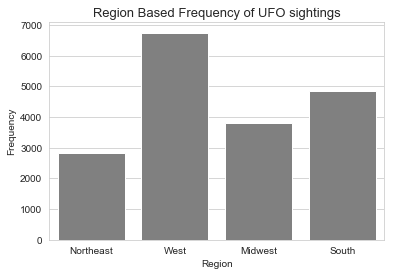

In [15]:
sns.set_style("whitegrid")
sns.countplot(x='Region', data=reports,color='Grey')
plt.title('Region Based Frequency of UFO sightings',size=13)
plt.ylabel('Frequency')
plt.show() 

### Plotting frequency of UFO sightings based on time of day

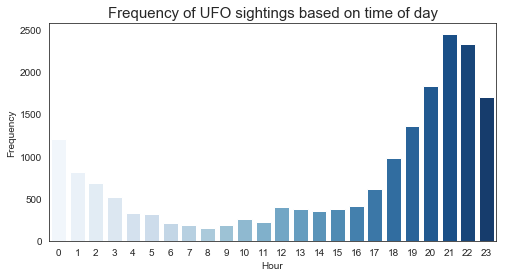

In [16]:
sns.set_style("white")
plt.figure(figsize=(8,4))
sns.countplot(x='Hour', data=reports,palette='Blues')
plt.title('Frequency of UFO sightings based on time of day',size=15)
plt.ylabel('Frequency')
plt.show()

### Plotting frequency of UFO sightings based on month

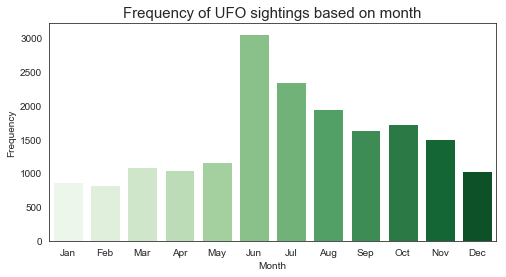

In [17]:
sns.set_style("white")
plt.figure(figsize=(8,4))
order = ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
sns.countplot(x='Month', data=reports,palette='Greens',order=order)
plt.title('Frequency of UFO sightings based on month',size=15)
plt.ylabel('Frequency')
 

plt.show()

### Plotting distribution of UFO sightings by year

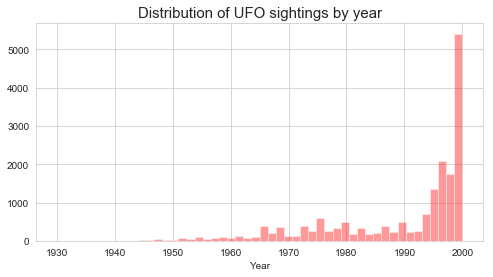

In [18]:
plt.figure(figsize=(8,4))
sns.set_style("whitegrid")
sns.distplot(reports['Year'],kde=False,color='red')
plt.title('Distribution of UFO sightings by year',size=15)

plt.show()

### Plotting heatmap based on years and states
* From the previous plot it is quiet clear that the most amount of UFO sightings was between 1990-2000 year.

In [19]:
reports2 = reports[reports['Year']>=1990]

* Grouping new DataFrame for heatmap

In [20]:
def count(rows):
    return len(rows)

group = reports2.groupby('Year State'.split()).apply(count).unstack()

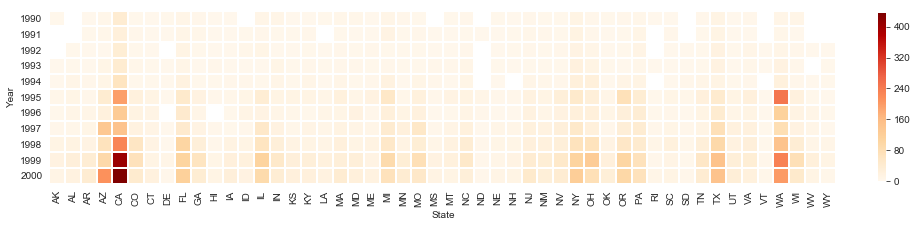

In [21]:
plt.figure(figsize=(15,10))
sns.heatmap(group,square=True,cbar_kws={'fraction' : 0.01},cmap='OrRd',linewidth=1)
plt.show()

### Finding 5 most frequent reported Colors and Shapes of UFO
* Taking for my analysis 6 most frequent, because it is already known that in Colors and Shape columns the most frequent values are 'UNKNOWN' and 'VARIOUS'

In [22]:
count1 = reports['Colors Reported'].value_counts()
count1.nlargest(6)

UNKNOWN    15359
RED          780
GREEN        531
ORANGE       528
BLUE         450
YELLOW       169
Name: Colors Reported, dtype: int64

In [23]:
count2 = reports['Shape Reported'].value_counts()
count2.nlargest(6)

VARIOUS     4379
LIGHT       2803
DISK        2122
TRIANGLE    1889
CIRCLE      1365
SPHERE      1054
Name: Shape Reported, dtype: int64